# Final Project

## Logan Mormando
## K-State Honor Code

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [55]:
movies = pd.read_csv("data/movie_metadata.csv")
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [56]:
#Removing columns with missing values to make our data more reliable
movies_rev = movies.dropna()
movies_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

# Exploratory Data Analysis 

In [57]:
# correlation analysis
movies.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


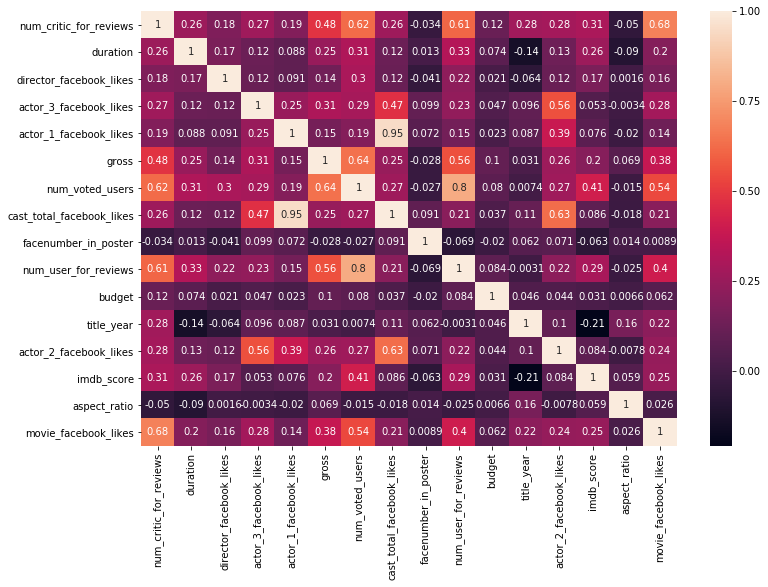

In [58]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(movies.corr(), annot=True)

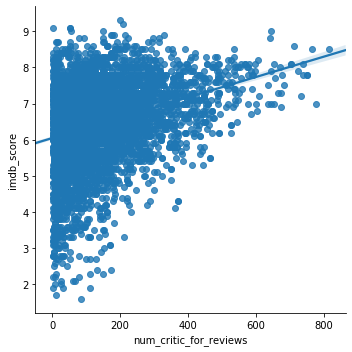

In [59]:
sns.lmplot('num_critic_for_reviews', 'imdb_score', movies)

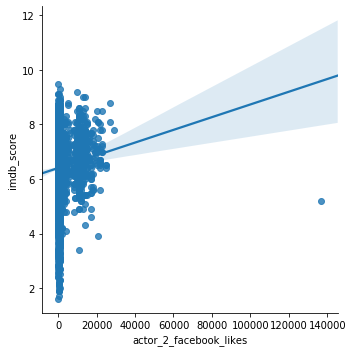

In [60]:
sns.lmplot('actor_2_facebook_likes', 'imdb_score', movies)

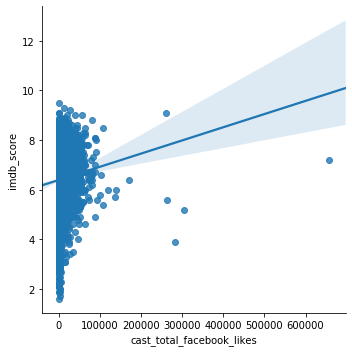

In [61]:
sns.lmplot('cast_total_facebook_likes', 'imdb_score', movies)

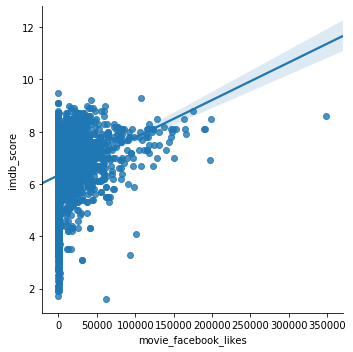

In [62]:
sns.lmplot('movie_facebook_likes', 'imdb_score', movies)

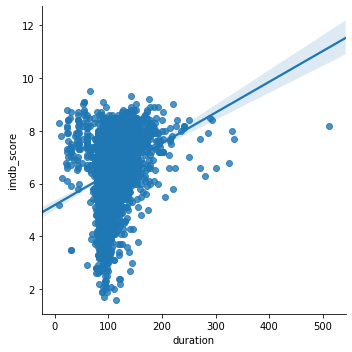

In [63]:
sns.lmplot('duration', 'imdb_score', movies)

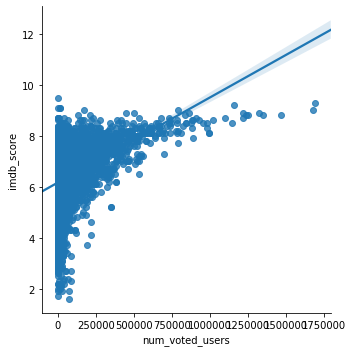

In [65]:
sns.lmplot('num_voted_users', 'imdb_score', movies)

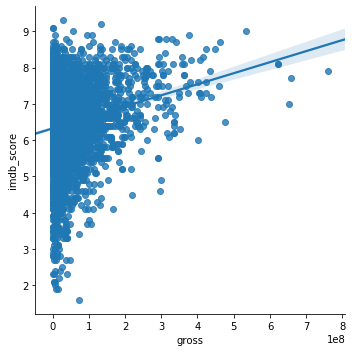

In [66]:
sns.lmplot('gross', 'imdb_score', movies)

# Model Development: Regression
- We use **scikit**, the python package for statistical analysis and data mining (predictive analytics)

In [77]:
#assigning columns to X and Y variables
X = movies_rev['num_voted_users']
y = movies_rev['imdb_score']

In [78]:
#Three Steps
#Initialize algorithm
#Train algorithm so we can build model
#Plug data into algorithm

# We create the model and call it lr.
model1 = lm.LinearRegression()
# We train the model on our training dataset.
model1.fit(X[:,np.newaxis], y)    ## X needs to be 2d for LinearRegression so add [:,np.newaxis]
# Now, we predict points with our trained model.
model1_y = model1.predict(X[:,np.newaxis])

In [79]:
# The coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)

Coefficients:  [3.35161882e-06]
y-intercept  6.1105913462261245


** Linear Regression Model: y = 3.35e-06x - 6.1106**

One unit increase in num_voted_users increases imbd_score by about 3.35e-06

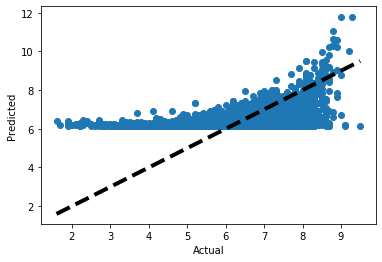

In [70]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [73]:
# Let's build 2nd model
X = movies_rev['num_critic_for_reviews']
y = movies_rev['imdb_score'] 
model2 = lm.LinearRegression()
model2.fit(X[:,np.newaxis], y)
model2_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [0.00297648]
y-intercept  5.967083226811995


In [75]:
# Choose a different variable as X and develop another (3rd) linear regression model (model3).
X = movies_rev['duration']
y = movies_rev['imdb_score'] 
model3 = lm.LinearRegression()
model3.fit(X[:,np.newaxis], y)
model3_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model3.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [0.01708061]
y-intercept  5.967083226811995


In [76]:
print("%.10f" % model3.coef_)

0.0170806112


# Model Evaluation
- Which model is better? **The goal of regression model is to minimize Sum of Squared Error (SSE)**

In [80]:
print("mean square error: ", mean_squared_error(y, model1_y))
print(explained_variance_score(y, model1_y))

mean square error:  0.8557731125070354
0.23273832520783921


In [81]:
print("mean square error: ", mean_squared_error(y, model2_y))
print(explained_variance_score(y, model2_y))

mean square error:  0.9803743556162321
0.12102441754710802


In [82]:
# evaluate your model (3rd)
print("mean square error: ", mean_squared_error(y, model3_y))
print(explained_variance_score(y, model3_y))

mean square error:  1.0966735007961588
0.04267027388749389


#### Residual plot (optional)

In [83]:
# install yellowbrick

!pip install yellowbrick

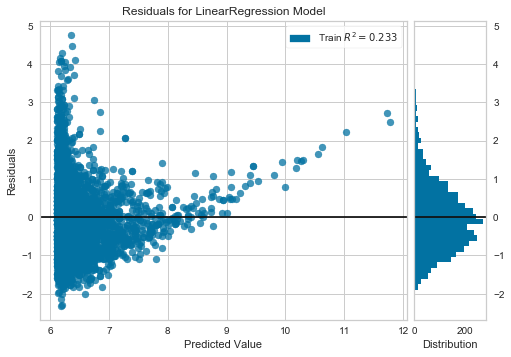

In [84]:
from yellowbrick.regressor import ResidualsPlot

X = movies_rev['num_voted_users']
y = movies_rev['imdb_score'] 

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X[:,np.newaxis], y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

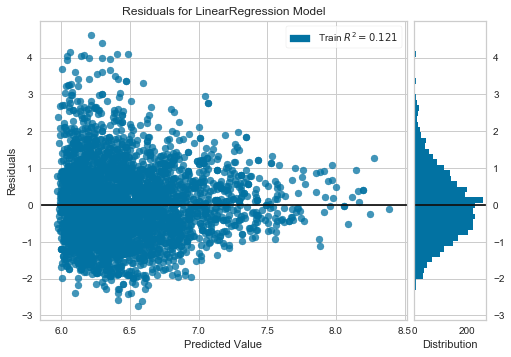

In [85]:
from yellowbrick.regressor import ResidualsPlot

X = movies_rev['num_critic_for_reviews']
y = movies_rev['imdb_score'] 

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X[:,np.newaxis], y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

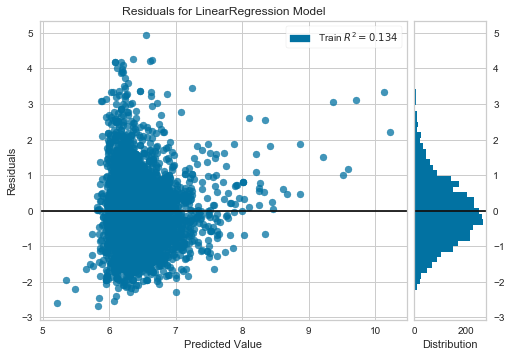

In [86]:
X = movies_rev['duration']
y = movies_rev['imdb_score'] 

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X[:,np.newaxis], y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

# Appendix 

In [87]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [88]:
# print the predicted y value (model 1)
print(model1_y)

[9.08080935 7.68994117 7.03519573 ... 6.35404959 6.28505986 6.12495303]


# Regression using Statsmodels
- http://statsmodels.sourceforge.net/
- Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.
- This package is an **alternative to scikit python package**

In [89]:
runs_reg_model1 = ols("imdb_score~num_voted_users",movies_rev)
runs_reg1 = runs_reg_model1.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1139.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          2.95e-218
Time:                        17:37:48   Log-Likelihood:                -5037.0
No. Observations:                3756   AIC:                         1.008e+04
Df Residuals:                    3754   BIC:                         1.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.1106      0.018    3

In [91]:
runs_reg_model2 = ols("imdb_score~num_critic_for_reviews",movies_rev)
runs_reg2 = runs_reg_model2.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     516.9
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          2.61e-107
Time:                        17:38:37   Log-Likelihood:                -5292.3
No. Observations:                3756   AIC:                         1.059e+04
Df Residuals:                    3754   BIC:                         1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [92]:
runs_reg2.mse_resid

0.9808966648094214

- The first model has a R-squared of 0.233.

- The second model has a R-squared of 0.121.

- Based on this analysis, we could confirm that the first model using **num_voted_users** is a better model.

In [94]:
# Develop the 3rd model

runs_reg_model3 = ols("imdb_score~duration",movies_rev)
runs_reg3 = runs_reg_model3.fit()
print(runs_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     581.5
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.45e-119
Time:                        17:39:42   Log-Likelihood:                -5264.1
No. Observations:                3756   AIC:                         1.053e+04
Df Residuals:                    3754   BIC:                         1.054e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5820      0.080     57.469      0.0

## Plots (Statsmodels)

- https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
- https://www.statsmodels.org/stable/graphics.html#regression-plots

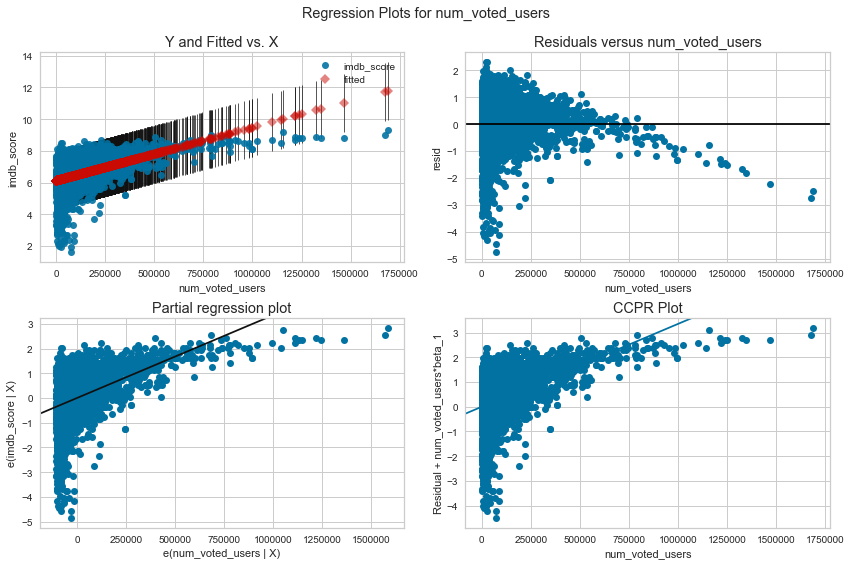

In [95]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(runs_reg1, "num_voted_users", fig=fig)

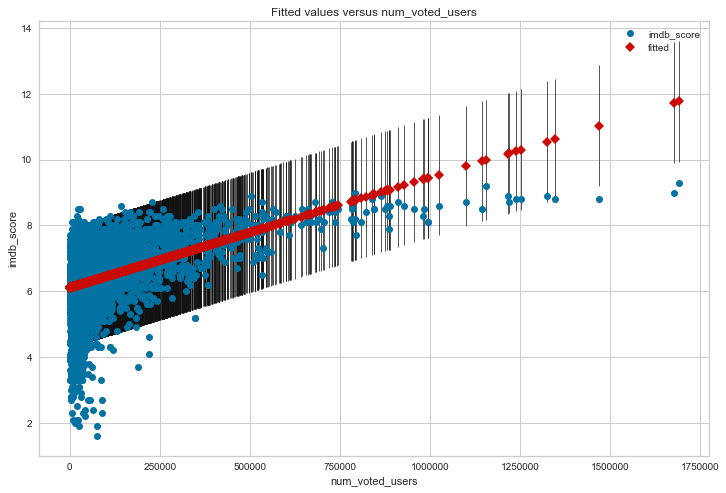

In [96]:
# fit plot

fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(runs_reg1, "num_voted_users", ax=ax)

# Classification

### Import Packages

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

In [184]:
mv=pd.read_csv("data/movie_metadata.csv")
print(mv.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [199]:
mv = mv.drop(['color'])

KeyError: "['color'] not found in axis"

In [185]:
mv['imdb_score'] = pd.cut(mv.imdb_score, bins=[0,3.9,5.9,7.9,10], include_lowest=False, right=True, labels =['bad', 'OK', 'good', 'excellent'])

In [186]:
mv.imdb_score.head()

0         good
1         good
2         good
3    excellent
4         good
Name: imdb_score, dtype: category
Categories (4, object): [bad < OK < good < excellent]

In [187]:
#Correlation Analysis
mv.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,-0.024719,0.400594


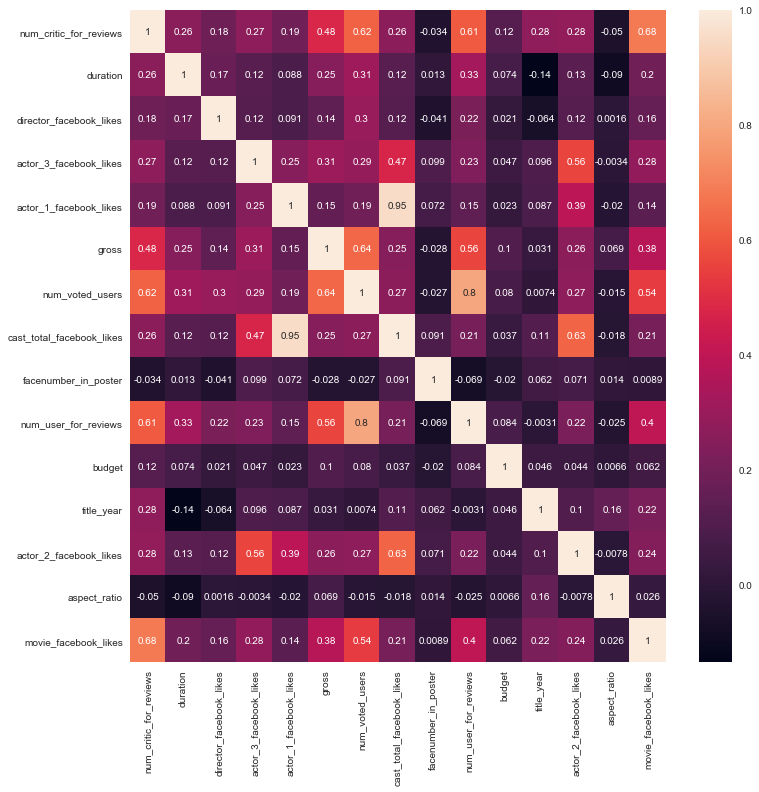

In [188]:
# plotting the correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(mv.corr(), annot=True)

In [190]:
# the percentage of bad,OK,good, and excellent scores
mv['imdb_score'].value_counts()/len(mv)*100
#64.66% of movies were good
#25.74% of movies were OK
#6.50% of movies were excellent
#3.10% of movies were bad

good         64.663891
OK           25.738648
excellent     6.504065
bad           3.093397
Name: imdb_score, dtype: float64

## Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [192]:
X = mv.drop(['imdb_score'], axis=1)
y = mv['imdb_score']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)*100

ValueError: could not convert string to float: 'Color'

In [195]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.